In [1]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
import lightgbm
from lightgbm import LGBMClassifier
import catboost
from catboost import CatBoostClassifier
from copy import deepcopy as copy
from sklearn.feature_selection import f_regression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
dir = '/content/drive/MyDrive/VoiceNet/'

In [5]:
with open(str(dir)+'parkinsons.data') as f:
  data = pd.read_csv(f)

In [6]:
display(data)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [7]:
X_df = data["MDVP:Fo(Hz)	MDVP:Fhi(Hz)	MDVP:Flo(Hz)	MDVP:Jitter(%)	MDVP:Jitter(Abs)	MDVP:RAP	MDVP:PPQ	Jitter:DDP	MDVP:Shimmer	MDVP:Shimmer(dB)	Shimmer:APQ3	Shimmer:APQ5	MDVP:APQ	Shimmer:DDA	NHR	HNR	RPDE	DFA	spread1	spread2	D2	PPE".split()]
y_df = data["status"]

In [8]:
display(X_df)
display(y_df)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [9]:
X = X_df.to_numpy()
y = np.expand_dims(y_df.to_numpy(), axis=1)

In [10]:
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")
print(f"Number of negative (healthy) examples: {np.sum(1-y)}")
print(f"Number of positive (PD) examples: {np.sum(y)}")

X.shape: (195, 22)
y.shape: (195, 1)
Number of negative (healthy) examples: 48
Number of positive (PD) examples: 147


In [11]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=25)

In [12]:
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, shuffle=True, random_state=25)

In [13]:
print(f"Training set sizes: x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"Validation set sizes: x_val: {x_val.shape}, y_val: {y_val.shape}")
print(f"Test set sizes: x_test: {x_test.shape}, y_test: {y_test.shape}")

Training set sizes: x_train: (117, 22), y_train: (117, 1)
Validation set sizes: x_val: (39, 22), y_val: (39, 1)
Test set sizes: x_test: (39, 22), y_test: (39, 1)


In [14]:
def train_xbg(x, y):
  return XGBClassifier().fit(x, y)

def train_hist_grad(x, y):
  return HistGradientBoostingClassifier().fit(x, y)

def train_grad(x, y):
  return GradientBoostingClassifier().fit(x, y)

def train_lgbm(x, y):
  return LGBMClassifier().fit(x, y)

def train_cat(x, y):
  return CatBoostClassifier(verbose=0, n_estimators=200).fit(x, y)

In [15]:
def run_models(x_train, y_train, x_val, y_val):
  xbg = train_xbg(x_train, y_train)
  hist_grad = train_hist_grad(x_train, y_train)
  grad = train_grad(x_train, y_train)
  lgbm = train_lgbm(x_train, y_train)
  cat = train_cat(x_train, y_train)

  print(f"XBG accuracy: {xbg.score(x_val, y_val)}")
  print(f"HIST_GRAD accuracy: {hist_grad.score(x_val, y_val)}")
  print(f"GRAD accuracy: {grad.score(x_val, y_val)}")
  print(f"LGBM accuracy: {lgbm.score(x_val, y_val)}")
  print(f"CAT accuracy: {cat.score(x_val, y_val)}")

  return xbg, hist_grad, grad, lgbm, cat

In [16]:
xbg, hist_grad, grad, lgbm, cat = run_models(x_train, y_train, x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 86, number of negative: 31
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735043 -> initscore=1.020360
[LightGBM] [Info] Start training from score 1.020360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [17]:
pca = PCA(n_components=20)
pca.fit(x_train)

pca_x_train = copy(x_train)
pca_x_val = copy(x_val)

pca_x_train = pca.transform(pca_x_train)
pca_x_val = pca.transform(pca_x_val)

In [18]:
xbg_pca, hist_grad_pca, grad_pca, lgbm_pca, cat_pca = run_models(pca_x_train, y_train, pca_x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 86, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735043 -> initscore=1.020360
[LightGBM] [Info] Start training from score 1.020360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [19]:
def select_features(x, y, K=20, return_not_selected=False):

  X = pd.DataFrame(x, columns = X_df.columns.to_list())

  # compute F-statistics and initialize correlation matrix
  F = pd.Series(f_regression(X, y)[0], index = X.columns)
  corr = pd.DataFrame(.00001, index = X.columns, columns = X.columns)

  # initialize list of selected features and list of excluded features
  selected = []
  not_selected = X.columns.to_list()

  # repeat K times
  for i in range(K):

      # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
      if i > 0:
          last_selected = selected[-1]
          corr.loc[not_selected, last_selected] = X[not_selected].corrwith(X[last_selected]).abs().clip(.00001)

      # compute FCQ score for all the (currently) excluded features (this is Formula 2)
      score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001)

      # find best feature, add it to selected and remove it from not_selected
      best = score.index[score.argmax()]
      selected.append(best)
      not_selected.remove(best)

  if return_not_selected:
    return selected, not_selected
  return selected

In [20]:
selected = select_features(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
print(selected)

['spread1', 'MDVP:Fhi(Hz)', 'PPE', 'MDVP:Flo(Hz)', 'spread2', 'MDVP:Fo(Hz)', 'D2', 'MDVP:Shimmer', 'MDVP:APQ', 'MDVP:Jitter(Abs)', 'HNR', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'DFA', 'Shimmer:APQ3', 'Shimmer:DDA', 'RPDE', 'MDVP:PPQ', 'MDVP:Jitter(%)', 'MDVP:RAP']


In [22]:
def get_feature_index(feature, features=X_df.columns.to_list()):
  for i, f in enumerate(features):
    if feature == f:
      return i
  return -1

def mrmr(x, selected):
  feature_indices = []
  for feature in selected:
    feature_indices.append(get_feature_index(feature))
  return x[:, feature_indices]

In [23]:
mrmr_x_train = mrmr(x_train, selected)
mrmr_x_val = mrmr(x_val, selected)

In [24]:
xbg_mrmr, hist_grad_mrmr, grad_mrmr, lgbm_mrmr, cat_mrmr = run_models(mrmr_x_train, y_train, mrmr_x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 86, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735043 -> initscore=1.020360
[LightGBM] [Info] Start training from score 1.020360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [25]:
minmax_x_train = (x_train - np.min(x_train, axis=0))/(np.max(x_train, axis=0) - np.min(x_train, axis=0))
minmax_x_val = (x_val - np.min(x_train, axis=0))/(np.max(x_train, axis=0) - np.min(x_train, axis=0))

pca_minmax_x_train = (pca_x_train - np.min(pca_x_train, axis=0))/(np.max(pca_x_train, axis=0) - np.min(pca_x_train, axis=0))
pca_minmax_x_val = (pca_x_val - np.min(pca_x_train, axis=0))/(np.max(pca_x_train, axis=0) - np.min(pca_x_train, axis=0))

mrmr_minmax_x_train = (mrmr_x_train - np.min(mrmr_x_train, axis=0))/(np.max(mrmr_x_train, axis=0) - np.min(mrmr_x_train, axis=0))
mrmr_minmax_x_val = (mrmr_x_val - np.min(mrmr_x_train, axis=0))/(np.max(mrmr_x_train, axis=0) - np.min(mrmr_x_train, axis=0))

In [26]:
xbg_minmax, hist_grad_minmax, grad_minmax, lgbm_minmax, cat_minmax = run_models(minmax_x_train, y_train, minmax_x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 86, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735043 -> initscore=1.020360
[LightGBM] [Info] Start training from score 1.020360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [27]:
xbg_pca_minmax, hist_grad_pca_minmax, grad_pca_minmax, lgbm_pca_minmax, cat_pca_minmax = run_models(pca_minmax_x_train, y_train, pca_minmax_x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 86, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735043 -> initscore=1.020360
[LightGBM] [Info] Start training from score 1.020360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [28]:
xbg_mrmr_minmax, hist_grad_mrmr_minmax, grad_mrmr_minmax, lgbm_mrmr_minmax, cat_mrmr_minmax = run_models(mrmr_minmax_x_train, y_train, mrmr_minmax_x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 86, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735043 -> initscore=1.020360
[LightGBM] [Info] Start training from score 1.020360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [29]:
stand_x_train = (x_train - np.mean(x_train, axis=0))/np.std(x_train, axis=0)
stand_x_val = (x_val - np.mean(x_val, axis=0))/np.std(x_val, axis=0)

pca_stand_x_train = (pca_x_train - np.mean(pca_x_train, axis=0))/np.std(pca_x_train, axis=0)
pca_stand_x_val = (pca_x_val - np.mean(pca_x_val, axis=0))/np.std(pca_x_val, axis=0)

mrmr_stand_x_train = (mrmr_x_train - np.mean(mrmr_x_train, axis=0))/np.std(mrmr_x_train, axis=0)
mrmr_stand_x_val = (mrmr_x_val - np.mean(mrmr_x_val, axis=0))/np.std(mrmr_x_val, axis=0)

In [30]:
xbg_stand, hist_grad_stand, grad_stand, lgbm_stand, cat_stand = run_models(stand_x_train, y_train, stand_x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 86, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735043 -> initscore=1.020360
[LightGBM] [Info] Start training from score 1.020360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [31]:
xbg_pca_stand, hist_grad_pca_stand, grad_pca_stand, lgbm_pca_stand, cat_pca_stand = run_models(pca_stand_x_train, y_train, pca_stand_x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 86, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 812
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735043 -> initscore=1.020360
[LightGBM] [Info] Start training from score 1.020360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [32]:
xbg_mrmr_stand, hist_grad_mrmr_stand, grad_mrmr_stand, lgbm_mrmr_stand, cat_mrmr_stand = run_models(mrmr_stand_x_train, y_train, mrmr_stand_x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Info] Number of positive: 86, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735043 -> initscore=1.020360
[LightGBM] [Info] Start training from score 1.020360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [33]:
pca_x_test = copy(x_test)
pca_x_test = pca.transform(pca_x_test)

minmax_x_test = copy(x_test)
minmax_x_test = (minmax_x_test - np.min(x_train, axis=0))/(np.max(x_train, axis=0) - np.min(x_train, axis=0))

mrmr_x_test = mrmr(x_test, selected)
mrmr_minmax_x_test = (mrmr_x_test - np.min(mrmr_x_train, axis=0))/(np.max(mrmr_x_train, axis=0) - np.min(mrmr_x_train, axis=0))

In [34]:
# Best model (based on val set performance) hist_grad_mrmr_minmax
print(f"HIST_GRAD_MRMR_MINMAX accuracy: {hist_grad_mrmr_minmax.score(mrmr_minmax_x_test, y_test)}")

HIST_GRAD_MRMR_MINMAX accuracy: 0.8974358974358975


# Evaluations (Validation Set)

In [35]:
th = 0.5

In [36]:
eval_metrics = "TP	TN	FP	FN	Accuracy	Prevalence	Sensitivity	Specificity	PPV	NPV	AUC	F1	Threshold".split()
model_names=["XGBoost", "HistGradientBoosting", "GradientBoosting", "LightGBM", "CatBoost"]

In [37]:
# Function to plot a confusion matrix for a model based on its predictions
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix", xlabel="Prediction", ylabel="True", th=th):
  conf_matrix = confusion_matrix(y_true, (y_pred > th))
  names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
  percents = ["{0:.3%}".format(num) for num in conf_matrix.flatten()/np.sum(conf_matrix)]
  labels = []
  for i in range(conf_matrix.shape[0]):
    labels.append([])
    for j in range(conf_matrix.shape[1]):
      labels[-1].append(f"{names[2*i+j]}\n{conf_matrix[i, j]}\n{percents[2*i+j]}")
  sns.heatmap(conf_matrix, annot=labels, cmap='Blues', fmt='')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

In [38]:
# Functions to get true positives, true negatives, false positives, and false negatives
def true_positives(y, p, th=th):
  pred = np.expand_dims(p, axis=1)
  thresholded_preds = pred > th
  TP = np.sum((y == 1) & (thresholded_preds == 1))
  return TP

def true_negatives(y, p, th=th):
  pred = np.expand_dims(p, axis=1)
  thresholded_preds = pred > th
  TN = np.sum((y == 0) & (thresholded_preds == 0))
  return TN

def false_positives(y, p, th=th):
  pred = np.expand_dims(p, axis=1)
  thresholded_preds = pred > th
  FP = np.sum((y == 0) & (thresholded_preds == 1))
  return FP

def false_negatives(y, p, th=th):
  pred = np.expand_dims(p, axis=1)
  thresholded_preds = pred > th
  FN = np.sum((y == 1) & (thresholded_preds == 0))
  return FN

In [39]:
# Function to get the accuracy
def get_accuracy(y, pred, th=th, epsilon=1e-100):
  TP = true_positives(y, pred, th)
  FP = false_positives(y, pred, th)
  TN = true_negatives(y, pred, th)
  FN = false_negatives(y, pred, th)
  accuracy = (TP + TN) / (TP + TN + FP + FN + epsilon)
  return accuracy

In [40]:
# Function to get the prevalence
def get_prevalence(y, class_num=1):
  prevalence = np.mean(y==class_num)
  return prevalence

In [41]:
# Function to get the sensitivity
def get_sensitivity(y, pred, th=th, epsilon=1e-100):
  TP = true_positives(y, pred, th)
  FN = false_negatives(y, pred, th)
  sensitivity = TP / (TP + FN + epsilon)
  return sensitivity

In [42]:
# Function to get the specificity
def get_specificity(y, pred, th=th, epsilon=1e-100):
    TN = true_negatives(y, pred, th)
    FP = false_positives(y, pred, th)
    specificity = TN / (TN + FP + epsilon)
    return specificity

In [43]:
# Function to get the ppv
def get_ppv(y, pred, th=th, epsilon=1e-100):
  TP = true_positives(y, pred, th)
  FP = false_positives(y, pred, th)
  PPV = TP / (TP + FP + epsilon)
  return PPV

In [44]:
# Function to get the npv
def get_npv(y, pred, th=th, epsilon=1e-100):
    TN = true_negatives(y, pred, th)
    FN = false_negatives(y, pred, th)
    NPV = TN / (TN + FN + epsilon)
    return NPV

In [45]:
def get_f1_score(y, pred, th=th, epsilon=1e-100):
  TP = true_positives(y, pred, th)
  FP = false_positives(y, pred, th)
  FN = false_negatives(y, pred, th)
  f1_score = TP/(TP + 0.5 * (FP + FN) + epsilon)
  return f1_score

In [46]:
def eval_table(models, x, y, title, model_names=model_names):
  evaluations = {metric: {model_name:None for model_name in model_names} for metric in eval_metrics}
  for i, model in enumerate(models):
    preds = model.predict(x)
    TP = true_positives(y, preds)
    TN = true_negatives(y, preds)
    FP = false_positives(y, preds)
    FN = false_negatives(y, preds)
    accuracy = get_accuracy(y, preds)
    prevalence = get_prevalence(y)
    sensitivity = get_sensitivity(y, preds)
    specificity = get_specificity(y, preds)
    ppv = get_ppv(y, preds)
    npv = get_npv(y, preds)
    auc_value = roc_auc_score(y, preds)
    f1_score = get_f1_score(y, preds)

    evaluations["TP"][model_names[i]] = TP
    evaluations["TN"][model_names[i]] = TN
    evaluations["FP"][model_names[i]] = FP
    evaluations["FN"][model_names[i]] = FN
    evaluations["Accuracy"][model_names[i]] = accuracy
    evaluations["Prevalence"][model_names[i]] = prevalence
    evaluations["Sensitivity"][model_names[i]] = sensitivity
    evaluations["Specificity"][model_names[i]] = specificity
    evaluations["PPV"][model_names[i]] = ppv
    evaluations["NPV"][model_names[i]] = npv
    evaluations["AUC"][model_names[i]] = auc_value
    evaluations["F1"][model_names[i]] = f1_score
    evaluations["Threshold"][model_names[i]] = th
  evaluations = pd.DataFrame(evaluations)
  evaluations = evaluations.style.set_caption(title)
  display(evaluations)

In [47]:
# No preprocessing, no feature selection
eval_table([xbg, hist_grad, grad, lgbm, cat], x_val, y_val, "Gradient Boosting Models on Validation Set")

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
XGBoost,28,6,2,3,0.871795,0.794872,0.903226,0.750000,0.933333,0.666667,0.826613,0.918033,0.500000
HistGradientBoosting,29,7,1,2,0.923077,0.794872,0.935484,0.875000,0.966667,0.777778,0.905242,0.950820,0.500000
GradientBoosting,26,5,3,5,0.794872,0.794872,0.838710,0.625000,0.896552,0.500000,0.731855,0.866667,0.500000
LightGBM,28,6,2,3,0.871795,0.794872,0.903226,0.750000,0.933333,0.666667,0.826613,0.918033,0.500000
CatBoost,27,6,2,4,0.846154,0.794872,0.870968,0.750000,0.931034,0.600000,0.810484,0.900000,0.500000


In [48]:
# PCA
eval_table([xbg_pca, hist_grad_pca, grad_pca, lgbm_pca, cat_pca], pca_x_val, y_val, "Gradient Boosting Models on Validation Set (PCA)")

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
XGBoost,27,4,4,4,0.794872,0.794872,0.870968,0.500000,0.870968,0.500000,0.685484,0.870968,0.500000
HistGradientBoosting,30,5,3,1,0.897436,0.794872,0.967742,0.625000,0.909091,0.833333,0.796371,0.937500,0.500000
GradientBoosting,27,5,3,4,0.820513,0.794872,0.870968,0.625000,0.900000,0.555556,0.747984,0.885246,0.500000
LightGBM,28,5,3,3,0.846154,0.794872,0.903226,0.625000,0.903226,0.625000,0.764113,0.903226,0.500000
CatBoost,31,4,4,0,0.897436,0.794872,1.000000,0.500000,0.885714,1.000000,0.750000,0.939394,0.500000


In [49]:
# mRMR
eval_table([xbg_mrmr, hist_grad_mrmr, grad_mrmr, lgbm_mrmr, cat_mrmr], mrmr_x_val, y_val, "Gradient Boosting Models on Validation Set (mRMR)")

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
XGBoost,28,6,2,3,0.871795,0.794872,0.903226,0.750000,0.933333,0.666667,0.826613,0.918033,0.500000
HistGradientBoosting,30,7,1,1,0.948718,0.794872,0.967742,0.875000,0.967742,0.875000,0.921371,0.967742,0.500000
GradientBoosting,26,6,2,5,0.820513,0.794872,0.838710,0.750000,0.928571,0.545455,0.794355,0.881356,0.500000
LightGBM,28,7,1,3,0.897436,0.794872,0.903226,0.875000,0.965517,0.700000,0.889113,0.933333,0.500000
CatBoost,28,6,2,3,0.871795,0.794872,0.903226,0.750000,0.933333,0.666667,0.826613,0.918033,0.500000


In [50]:
# MinMax
eval_table([xbg_minmax, hist_grad_minmax, grad_minmax, lgbm_minmax, cat_minmax], minmax_x_val, y_val, "Gradient Boosting Models on Validation Set (MinMax)")

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
XGBoost,28,6,2,3,0.871795,0.794872,0.903226,0.750000,0.933333,0.666667,0.826613,0.918033,0.500000
HistGradientBoosting,29,7,1,2,0.923077,0.794872,0.935484,0.875000,0.966667,0.777778,0.905242,0.950820,0.500000
GradientBoosting,25,5,3,6,0.769231,0.794872,0.806452,0.625000,0.892857,0.454545,0.715726,0.847458,0.500000
LightGBM,29,6,2,2,0.897436,0.794872,0.935484,0.750000,0.935484,0.750000,0.842742,0.935484,0.500000
CatBoost,27,6,2,4,0.846154,0.794872,0.870968,0.750000,0.931034,0.600000,0.810484,0.900000,0.500000


In [51]:
# MinMax + PCA
eval_table([xbg_pca_minmax, hist_grad_pca_minmax, grad_pca_minmax, lgbm_pca_minmax, cat_pca_minmax], pca_minmax_x_val, y_val, "Gradient Boosting Models on Validation Set (MinMax + PCA)")

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
XGBoost,27,4,4,4,0.794872,0.794872,0.870968,0.500000,0.870968,0.500000,0.685484,0.870968,0.500000
HistGradientBoosting,30,5,3,1,0.897436,0.794872,0.967742,0.625000,0.909091,0.833333,0.796371,0.937500,0.500000
GradientBoosting,26,5,3,5,0.794872,0.794872,0.838710,0.625000,0.896552,0.500000,0.731855,0.866667,0.500000
LightGBM,27,5,3,4,0.820513,0.794872,0.870968,0.625000,0.900000,0.555556,0.747984,0.885246,0.500000
CatBoost,31,4,4,0,0.897436,0.794872,1.000000,0.500000,0.885714,1.000000,0.750000,0.939394,0.500000


In [52]:
# MinMax + mRMR
eval_table([xbg_mrmr_minmax, hist_grad_mrmr_minmax, grad_mrmr_minmax, lgbm_mrmr_minmax, cat_mrmr_minmax], mrmr_minmax_x_val, y_val, "Gradient Boosting Models on Validation Set (MinMax + mRMR)")

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
XGBoost,28,6,2,3,0.871795,0.794872,0.903226,0.750000,0.933333,0.666667,0.826613,0.918033,0.500000
HistGradientBoosting,30,7,1,1,0.948718,0.794872,0.967742,0.875000,0.967742,0.875000,0.921371,0.967742,0.500000
GradientBoosting,26,6,2,5,0.820513,0.794872,0.838710,0.750000,0.928571,0.545455,0.794355,0.881356,0.500000
LightGBM,28,6,2,3,0.871795,0.794872,0.903226,0.750000,0.933333,0.666667,0.826613,0.918033,0.500000
CatBoost,28,6,2,3,0.871795,0.794872,0.903226,0.750000,0.933333,0.666667,0.826613,0.918033,0.500000


In [53]:
# Standardization
eval_table([xbg_stand, hist_grad_stand, grad_stand, lgbm_stand, cat_stand], stand_x_val, y_val, "Gradient Boosting Models on Validation Set (Standardization)")

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
XGBoost,28,5,3,3,0.846154,0.794872,0.903226,0.625000,0.903226,0.625000,0.764113,0.903226,0.500000
HistGradientBoosting,29,5,3,2,0.871795,0.794872,0.935484,0.625000,0.906250,0.714286,0.780242,0.920635,0.500000
GradientBoosting,28,5,3,3,0.846154,0.794872,0.903226,0.625000,0.903226,0.625000,0.764113,0.903226,0.500000
LightGBM,29,5,3,2,0.871795,0.794872,0.935484,0.625000,0.906250,0.714286,0.780242,0.920635,0.500000
CatBoost,27,5,3,4,0.820513,0.794872,0.870968,0.625000,0.900000,0.555556,0.747984,0.885246,0.500000


In [54]:
# Standardization + PCA
eval_table([xbg_pca_stand, hist_grad_pca_stand, grad_pca_stand, lgbm_pca_stand, cat_pca_stand], pca_stand_x_val, y_val, "Gradient Boosting Models on Validation Set (Standardization + PCA)")

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
XGBoost,30,3,5,1,0.846154,0.794872,0.967742,0.375000,0.857143,0.750000,0.671371,0.909091,0.500000
HistGradientBoosting,31,4,4,0,0.897436,0.794872,1.000000,0.500000,0.885714,1.000000,0.750000,0.939394,0.500000
GradientBoosting,29,5,3,2,0.871795,0.794872,0.935484,0.625000,0.906250,0.714286,0.780242,0.920635,0.500000
LightGBM,30,4,4,1,0.871795,0.794872,0.967742,0.500000,0.882353,0.800000,0.733871,0.923077,0.500000
CatBoost,31,4,4,0,0.897436,0.794872,1.000000,0.500000,0.885714,1.000000,0.750000,0.939394,0.500000


In [55]:
# Standardization + mRMR
eval_table([xbg_mrmr_stand, hist_grad_mrmr_stand, grad_mrmr_stand, lgbm_mrmr_stand, cat_mrmr_stand], mrmr_stand_x_val, y_val, "Gradient Boosting Models on Validation Set (Standardization + mRMR)")

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
XGBoost,29,3,5,2,0.820513,0.794872,0.935484,0.375000,0.852941,0.600000,0.655242,0.892308,0.500000
HistGradientBoosting,30,5,3,1,0.897436,0.794872,0.967742,0.625000,0.909091,0.833333,0.796371,0.937500,0.500000
GradientBoosting,28,5,3,3,0.846154,0.794872,0.903226,0.625000,0.903226,0.625000,0.764113,0.903226,0.500000
LightGBM,28,5,3,3,0.846154,0.794872,0.903226,0.625000,0.903226,0.625000,0.764113,0.903226,0.500000
CatBoost,28,5,3,3,0.846154,0.794872,0.903226,0.625000,0.903226,0.625000,0.764113,0.903226,0.500000


# Evaluations (Test Set)

In [56]:
test_preds = hist_grad_mrmr_minmax.predict(mrmr_minmax_x_test)

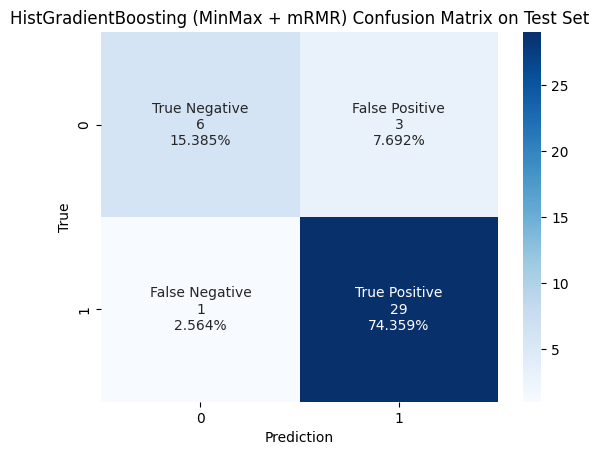

In [57]:
plot_confusion_matrix(y_test, test_preds, title="HistGradientBoosting (MinMax + mRMR) Confusion Matrix on Test Set")

In [58]:
eval_table([hist_grad_mrmr_minmax], mrmr_minmax_x_test, y_test, "HistGradientBoosting (MinMax + mRMR) on Test Set", model_names=["HistGradientBoosting"])

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
HistGradientBoosting,29,6,3,1,0.897436,0.769231,0.966667,0.666667,0.906250,0.857143,0.816667,0.935484,0.500000


# Evaluations (Validation Set) (With Less Metrics)

In [59]:
th = 0.5

In [60]:
eval_metrics = "TP	TN	FP	FN	Accuracy	Sensitivity	Specificity	AUC	F1	Threshold".split()
model_names=["XGBoost", "HistGradientBoosting", "GradientBoosting", "LightGBM", "CatBoost"]

In [61]:
# Function to plot a confusion matrix for a model based on its predictions
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix", xlabel="Prediction", ylabel="True", th=th):
  conf_matrix = confusion_matrix(y_true, (y_pred > th))
  names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
  percents = ["{0:.3%}".format(num) for num in conf_matrix.flatten()/np.sum(conf_matrix)]
  labels = []
  for i in range(conf_matrix.shape[0]):
    labels.append([])
    for j in range(conf_matrix.shape[1]):
      labels[-1].append(f"{names[2*i+j]}\n{conf_matrix[i, j]}\n{percents[2*i+j]}")
  sns.heatmap(conf_matrix, annot=labels, cmap='Blues', fmt='')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

In [62]:
# Functions to get true positives, true negatives, false positives, and false negatives
def true_positives(y, p, th=th):
  pred = np.expand_dims(p, axis=1)
  thresholded_preds = pred > th
  TP = np.sum((y == 1) & (thresholded_preds == 1))
  return TP

def true_negatives(y, p, th=th):
  pred = np.expand_dims(p, axis=1)
  thresholded_preds = pred > th
  TN = np.sum((y == 0) & (thresholded_preds == 0))
  return TN

def false_positives(y, p, th=th):
  pred = np.expand_dims(p, axis=1)
  thresholded_preds = pred > th
  FP = np.sum((y == 0) & (thresholded_preds == 1))
  return FP

def false_negatives(y, p, th=th):
  pred = np.expand_dims(p, axis=1)
  thresholded_preds = pred > th
  FN = np.sum((y == 1) & (thresholded_preds == 0))
  return FN

In [63]:
# Function to get the accuracy
def get_accuracy(y, pred, th=th, epsilon=1e-100):
  TP = true_positives(y, pred, th)
  FP = false_positives(y, pred, th)
  TN = true_negatives(y, pred, th)
  FN = false_negatives(y, pred, th)
  accuracy = (TP + TN) / (TP + TN + FP + FN + epsilon)
  return accuracy

In [64]:
# Function to get the prevalence
def get_prevalence(y, class_num=1):
  prevalence = np.mean(y==class_num)
  return prevalence

In [65]:
# Function to get the sensitivity
def get_sensitivity(y, pred, th=th, epsilon=1e-100):
  TP = true_positives(y, pred, th)
  FN = false_negatives(y, pred, th)
  sensitivity = TP / (TP + FN + epsilon)
  return sensitivity

In [66]:
# Function to get the specificity
def get_specificity(y, pred, th=th, epsilon=1e-100):
    TN = true_negatives(y, pred, th)
    FP = false_positives(y, pred, th)
    specificity = TN / (TN + FP + epsilon)
    return specificity

In [67]:
# Function to get the ppv
def get_ppv(y, pred, th=th, epsilon=1e-100):
  TP = true_positives(y, pred, th)
  FP = false_positives(y, pred, th)
  PPV = TP / (TP + FP + epsilon)
  return PPV

In [68]:
# Function to get the npv
def get_npv(y, pred, th=th, epsilon=1e-100):
    TN = true_negatives(y, pred, th)
    FN = false_negatives(y, pred, th)
    NPV = TN / (TN + FN + epsilon)
    return NPV

In [69]:
def get_f1_score(y, pred, th=th, epsilon=1e-100):
  TP = true_positives(y, pred, th)
  FP = false_positives(y, pred, th)
  FN = false_negatives(y, pred, th)
  f1_score = TP/(TP + 0.5 * (FP + FN) + epsilon)
  return f1_score

In [70]:
def str_round(i, n):
  return ("{i:."+str(n)+"f}").format(i=i)

In [71]:
def eval_table(models, x, y, title, model_names=model_names):
  evaluations = {metric: {model_name:None for model_name in model_names} for metric in eval_metrics}
  for i, model in enumerate(models):
    preds = model.predict(x)
    TP = true_positives(y, preds)
    TN = true_negatives(y, preds)
    FP = false_positives(y, preds)
    FN = false_negatives(y, preds)
    accuracy = round(get_accuracy(y, preds), 6)
    prevalence = get_prevalence(y)
    sensitivity = round(get_sensitivity(y, preds), 6)
    specificity = round(get_specificity(y, preds), 6)
    ppv = get_ppv(y, preds)
    npv = get_npv(y, preds)
    auc_value = round(roc_auc_score(y, preds), 6)
    f1_score = round(get_f1_score(y, preds), 6)

    evaluations["TP"][model_names[i]] = TP
    evaluations["TN"][model_names[i]] = TN
    evaluations["FP"][model_names[i]] = FP
    evaluations["FN"][model_names[i]] = FN
    evaluations["Accuracy"][model_names[i]] = str_round(accuracy*100, 4)
    evaluations["Sensitivity"][model_names[i]] = str_round(sensitivity*100, 4)
    evaluations["Specificity"][model_names[i]] = str_round(specificity*100, 4)
    evaluations["AUC"][model_names[i]] = str_round(auc_value, 6)
    evaluations["F1"][model_names[i]] = str_round(f1_score, 6)
    evaluations["Threshold"][model_names[i]] = th
  evaluations = pd.DataFrame(evaluations)
  evaluations = evaluations.style.set_caption(title)
  display(evaluations)

In [72]:
# No preprocessing, no feature selection
eval_table([xbg, hist_grad, grad, lgbm, cat], x_val, y_val, "Gradient Boosting Models on Validation Set")

,TP,TN,FP,FN,Accuracy,Sensitivity,Specificity,AUC,F1,Threshold
XGBoost,28,6,2,3,87.1795,90.3226,75.0000,0.826613,0.918033,0.500000
HistGradientBoosting,29,7,1,2,92.3077,93.5484,87.5000,0.905242,0.950820,0.500000
GradientBoosting,26,5,3,5,79.4872,83.8710,62.5000,0.731855,0.866667,0.500000
LightGBM,28,6,2,3,87.1795,90.3226,75.0000,0.826613,0.918033,0.500000
CatBoost,27,6,2,4,84.6154,87.0968,75.0000,0.810484,0.900000,0.500000


In [73]:
# PCA
eval_table([xbg_pca, hist_grad_pca, grad_pca, lgbm_pca, cat_pca], pca_x_val, y_val, "Gradient Boosting Models on Validation Set (PCA)")

,TP,TN,FP,FN,Accuracy,Sensitivity,Specificity,AUC,F1,Threshold
XGBoost,27,4,4,4,79.4872,87.0968,50.0000,0.685484,0.870968,0.500000
HistGradientBoosting,30,5,3,1,89.7436,96.7742,62.5000,0.796371,0.937500,0.500000
GradientBoosting,27,5,3,4,82.0513,87.0968,62.5000,0.747984,0.885246,0.500000
LightGBM,28,5,3,3,84.6154,90.3226,62.5000,0.764113,0.903226,0.500000
CatBoost,31,4,4,0,89.7436,100.0000,50.0000,0.750000,0.939394,0.500000


In [74]:
# mRMR
eval_table([xbg_mrmr, hist_grad_mrmr, grad_mrmr, lgbm_mrmr, cat_mrmr], mrmr_x_val, y_val, "Gradient Boosting Models on Validation Set (mRMR)")

,TP,TN,FP,FN,Accuracy,Sensitivity,Specificity,AUC,F1,Threshold
XGBoost,28,6,2,3,87.1795,90.3226,75.0000,0.826613,0.918033,0.500000
HistGradientBoosting,30,7,1,1,94.8718,96.7742,87.5000,0.921371,0.967742,0.500000
GradientBoosting,26,6,2,5,82.0513,83.8710,75.0000,0.794355,0.881356,0.500000
LightGBM,28,7,1,3,89.7436,90.3226,87.5000,0.889113,0.933333,0.500000
CatBoost,28,6,2,3,87.1795,90.3226,75.0000,0.826613,0.918033,0.500000


In [75]:
# MinMax
eval_table([xbg_minmax, hist_grad_minmax, grad_minmax, lgbm_minmax, cat_minmax], minmax_x_val, y_val, "Gradient Boosting Models on Validation Set (MinMax)")

,TP,TN,FP,FN,Accuracy,Sensitivity,Specificity,AUC,F1,Threshold
XGBoost,28,6,2,3,87.1795,90.3226,75.0000,0.826613,0.918033,0.500000
HistGradientBoosting,29,7,1,2,92.3077,93.5484,87.5000,0.905242,0.950820,0.500000
GradientBoosting,25,5,3,6,76.9231,80.6452,62.5000,0.715726,0.847458,0.500000
LightGBM,29,6,2,2,89.7436,93.5484,75.0000,0.842742,0.935484,0.500000
CatBoost,27,6,2,4,84.6154,87.0968,75.0000,0.810484,0.900000,0.500000


In [76]:
# MinMax + PCA
eval_table([xbg_pca_minmax, hist_grad_pca_minmax, grad_pca_minmax, lgbm_pca_minmax, cat_pca_minmax], pca_minmax_x_val, y_val, "Gradient Boosting Models on Validation Set (MinMax + PCA)")

,TP,TN,FP,FN,Accuracy,Sensitivity,Specificity,AUC,F1,Threshold
XGBoost,27,4,4,4,79.4872,87.0968,50.0000,0.685484,0.870968,0.500000
HistGradientBoosting,30,5,3,1,89.7436,96.7742,62.5000,0.796371,0.937500,0.500000
GradientBoosting,26,5,3,5,79.4872,83.8710,62.5000,0.731855,0.866667,0.500000
LightGBM,27,5,3,4,82.0513,87.0968,62.5000,0.747984,0.885246,0.500000
CatBoost,31,4,4,0,89.7436,100.0000,50.0000,0.750000,0.939394,0.500000


In [77]:
# MinMax + mRMR
eval_table([xbg_mrmr_minmax, hist_grad_mrmr_minmax, grad_mrmr_minmax, lgbm_mrmr_minmax, cat_mrmr_minmax], mrmr_minmax_x_val, y_val, "Gradient Boosting Models on Validation Set (MinMax + mRMR)")

,TP,TN,FP,FN,Accuracy,Sensitivity,Specificity,AUC,F1,Threshold
XGBoost,28,6,2,3,87.1795,90.3226,75.0000,0.826613,0.918033,0.500000
HistGradientBoosting,30,7,1,1,94.8718,96.7742,87.5000,0.921371,0.967742,0.500000
GradientBoosting,26,6,2,5,82.0513,83.8710,75.0000,0.794355,0.881356,0.500000
LightGBM,28,6,2,3,87.1795,90.3226,75.0000,0.826613,0.918033,0.500000
CatBoost,28,6,2,3,87.1795,90.3226,75.0000,0.826613,0.918033,0.500000


In [78]:
# Standardization
eval_table([xbg_stand, hist_grad_stand, grad_stand, lgbm_stand, cat_stand], stand_x_val, y_val, "Gradient Boosting Models on Validation Set (Standardization)")

,TP,TN,FP,FN,Accuracy,Sensitivity,Specificity,AUC,F1,Threshold
XGBoost,28,5,3,3,84.6154,90.3226,62.5000,0.764113,0.903226,0.500000
HistGradientBoosting,29,5,3,2,87.1795,93.5484,62.5000,0.780242,0.920635,0.500000
GradientBoosting,28,5,3,3,84.6154,90.3226,62.5000,0.764113,0.903226,0.500000
LightGBM,29,5,3,2,87.1795,93.5484,62.5000,0.780242,0.920635,0.500000
CatBoost,27,5,3,4,82.0513,87.0968,62.5000,0.747984,0.885246,0.500000


In [79]:
# Standardization + PCA
eval_table([xbg_pca_stand, hist_grad_pca_stand, grad_pca_stand, lgbm_pca_stand, cat_pca_stand], pca_stand_x_val, y_val, "Gradient Boosting Models on Validation Set (Standardization + PCA)")

,TP,TN,FP,FN,Accuracy,Sensitivity,Specificity,AUC,F1,Threshold
XGBoost,30,3,5,1,84.6154,96.7742,37.5000,0.671371,0.909091,0.500000
HistGradientBoosting,31,4,4,0,89.7436,100.0000,50.0000,0.750000,0.939394,0.500000
GradientBoosting,29,5,3,2,87.1795,93.5484,62.5000,0.780242,0.920635,0.500000
LightGBM,30,4,4,1,87.1795,96.7742,50.0000,0.733871,0.923077,0.500000
CatBoost,31,4,4,0,89.7436,100.0000,50.0000,0.750000,0.939394,0.500000


In [80]:
# Standardization + mRMR
eval_table([xbg_mrmr_stand, hist_grad_mrmr_stand, grad_mrmr_stand, lgbm_mrmr_stand, cat_mrmr_stand], mrmr_stand_x_val, y_val, "Gradient Boosting Models on Validation Set (Standardization + mRMR)")

,TP,TN,FP,FN,Accuracy,Sensitivity,Specificity,AUC,F1,Threshold
XGBoost,29,3,5,2,82.0513,93.5484,37.5000,0.655242,0.892308,0.500000
HistGradientBoosting,30,5,3,1,89.7436,96.7742,62.5000,0.796371,0.937500,0.500000
GradientBoosting,28,5,3,3,84.6154,90.3226,62.5000,0.764113,0.903226,0.500000
LightGBM,28,5,3,3,84.6154,90.3226,62.5000,0.764113,0.903226,0.500000
CatBoost,28,5,3,3,84.6154,90.3226,62.5000,0.764113,0.903226,0.500000
